# Structure Learning

In [1]:
using BayesNets
using PGFPlots

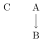

In [2]:
b = DiscreteBayesNet()
push!(b, DiscreteCPD(:A, [0.5,0.5]))
push!(b, DiscreteCPD(:B, [:A], [2], [Categorical([0.5,0.5]), Categorical([0.45,0.55])]))
push!(b, CategoricalCPD(:C, Categorical([0.5,0.5])))

In [3]:
d = rand(b, 5)

,C,A,B
1,1,1,2
2,1,1,2
3,2,2,1
4,1,2,1
5,1,2,1


In [4]:
map(Table, count(b, d)) # Map to Table so it displays in HTML

3-element Array{Table,1}:
 Table(2×2 DataFrame
│ Row │ C │ count │
├─────┼───┼───────┤
│ 1   │ 1 │ 4     │
│ 2   │ 2 │ 1     │)                
 Table(2×2 DataFrame
│ Row │ A │ count │
├─────┼───┼───────┤
│ 1   │ 1 │ 2     │
│ 2   │ 2 │ 3     │)                
 Table(2×3 DataFrame
│ Row │ A │ B │ count │
├─────┼───┼───┼───────┤
│ 1   │ 1 │ 2 │ 2     │
│ 2   │ 2 │ 1 │ 3     │)

In [5]:
prior = UniformPrior()

UniformPrior(1.0)

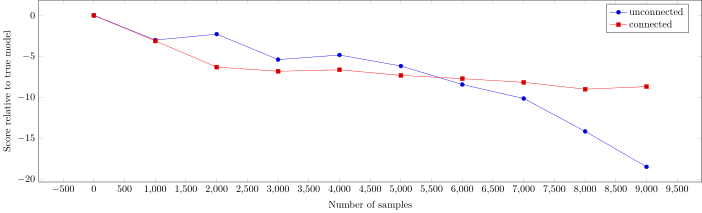

In [6]:
using Random
Random.seed!(0)

# generate a lot of data
d = rand(b, 10000);

sample_sizes = collect(1:1000:size(d,1))

# unconnected
bUnconnected = fit(DiscreteBayesNet, d, tuple())
scoreUnconnected = Float64[bayesian_score(bUnconnected, d[1:i,:], prior) for i in sample_sizes]

# fully connected
bConnected = fit(DiscreteBayesNet, d, (:A=>:B, :A=>:C, :B=>:C))
scoreConnected = Float64[bayesian_score(bConnected, d[1:i,:], prior) for i in sample_sizes]

# true
scoreTrue = Float64[bayesian_score(b, d[1:i,:], prior) for i in sample_sizes]

# plot
Axis(Plots.Plot[
    Plots.Linear(sample_sizes, scoreUnconnected - scoreTrue, legendentry="unconnected"),
    Plots.Linear(sample_sizes, scoreConnected - scoreTrue, legendentry="connected")
    ], xlabel="Number of samples", ylabel="Score relative to true model", width="25cm", height="8cm")